### Generate plots

### Input
* Before running this notebook you have to generate the input dataframe, **evaluation_all.tsv**, with the main.py script.
* Optionally, a mapping file specifying group and label of methods can be used to select only one method (the best) for each group and each namespace.

#### Output
* 3 figures, *fig_<metric>_<namespace>.png*
* 1 TSV, *fig_<metric>.tsv*

In [1]:
# Input
df_file = "../testing/evaluation_results/evaluation_all.tsv"
out_folder = "../testing/evaluation_results"

# Set to None if you don't want to use it. Results will not be grouped/filtered by team
names_file = None
# names_file = "../../CAFA-evaluator_data/CAFA3/names.tsv"

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('wf', ['wrc', 'wpr'])
# metric, cols = ('s', ['ru', 'mi'])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.set_loglevel("info")

In [3]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,cov,pr,rc,f
0,predictions.txt,biological_process,0.01,1.0,1.0,1.0,1.0
1,predictions.txt,biological_process,0.02,1.0,1.0,1.0,1.0
2,predictions.txt,biological_process,0.03,1.0,1.0,1.0,1.0
3,predictions.txt,biological_process,0.04,1.0,1.0,1.0,1.0
4,predictions.txt,biological_process,0.05,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
292,predictions.txt,cellular_component,0.95,1.0,1.0,1.0,1.0
293,predictions.txt,cellular_component,0.96,1.0,1.0,1.0,1.0
294,predictions.txt,cellular_component,0.97,1.0,1.0,1.0,1.0
295,predictions.txt,cellular_component,0.98,1.0,1.0,1.0,1.0


In [9]:
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # Set method information (optional)
    methods = pd.read_csv(names_file, delim_whitespace=True)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

cov   pr   rc    f  \
group           label           ns                 tau                        
predictions.txt predictions.txt biological_process 0.01  1.0  1.0  1.0  1.0   
                                                   0.02  1.0  1.0  1.0  1.0   
                                                   0.03  1.0  1.0  1.0  1.0   
                                                   0.04  1.0  1.0  1.0  1.0   
                                                   0.05  1.0  1.0  1.0  1.0   
...                                                      ...  ...  ...  ...   
                                cellular_component 0.95  1.0  1.0  1.0  1.0   
                                                   0.96  1.0  1.0  1.0  1.0   
                                                   0.97  1.0  1.0  1.0  1.0   
                                                   0.98  1.0  1.0  1.0  1.0   
                                                   0.99  1.0  1.0  1.0  1.0   

                                                         is_baseline  
group           label           ns                 tau                
predictions.txt predictions.txt biological_process 0.01        False  
                                                   0.02        False  
                                                   0.03        False  
                                                   0.04        False  
                                                   0.05        False  
...                                                              ...  
                                cellular_component 0.95        False  
                                                   0.96        False  
                                                   0.97        False  
                                                   0.98        False  
                                                   0.99        False  

[297 rows x 5 columns]

In [10]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

cov   pr   rc    f  \
group           label           ns                 tau                        
predictions.txt predictions.txt biological_process 0.01  1.0  1.0  1.0  1.0   
                                                   0.02  1.0  1.0  1.0  1.0   
                                                   0.03  1.0  1.0  1.0  1.0   
                                                   0.04  1.0  1.0  1.0  1.0   
                                                   0.05  1.0  1.0  1.0  1.0   
...                                                      ...  ...  ...  ...   
                                cellular_component 0.95  1.0  1.0  1.0  1.0   
                                                   0.96  1.0  1.0  1.0  1.0   
                                                   0.97  1.0  1.0  1.0  1.0   
                                                   0.98  1.0  1.0  1.0  1.0   
                                                   0.99  1.0  1.0  1.0  1.0   

                                                         is_baseline  \
group           label           ns                 tau                 
predictions.txt predictions.txt biological_process 0.01        False   
                                                   0.02        False   
                                                   0.03        False   
                                                   0.04        False   
                                                   0.05        False   
...                                                              ...   
                                cellular_component 0.95        False   
                                                   0.96        False   
                                                   0.97        False   
                                                   0.98        False   
                                                   0.99        False   

                                                                                                    colors  
group           label           ns                 tau                                                      
predictions.txt predictions.txt biological_process 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.02  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.03  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.04  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.05  (0.12156862745098039, 0.4666666666666667, 0.70...  
...                                                                                                    ...  
                                cellular_component 0.95  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.96  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.97  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.98  (0.12156862745098039, 0.4666666666666667, 0.70...  
                                                   0.99  (0.12156862745098039, 0.4666666666666667, 0.70...  

[297 rows x 6 columns]

In [11]:
# Identify best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'wf'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group            ns                
predictions.txt  biological_process    (predictions.txt, predictions.txt, biological_...
                 cellular_component    (predictions.txt, predictions.txt, cellular_co...
                 molecular_function    (predictions.txt, predictions.txt, molecular_f...
Name: f, dtype: object

In [12]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

cov  \
group           label           ns                 tau         
predictions.txt predictions.txt biological_process 0.01  1.0   
                                cellular_component 0.01  1.0   
                                molecular_function 0.01  1.0   

                                                                                                    colors  \
group           label           ns                 tau                                                       
predictions.txt predictions.txt biological_process 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                cellular_component 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   

                                                          rc   pr    f  
group           label           ns                 tau                  
predictions.txt predictions.txt biological_process 0.01  1.0  1.0  1.0  
                                cellular_component 0.01  1.0  1.0  1.0  
                                molecular_function 0.01  1.0  1.0  1.0

In [13]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()
# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if metric in ['f', 'wf']:
    df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
else:
    df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()
# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/fig_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau  cov  \
group           label           ns                              
predictions.txt predictions.txt biological_process  0.01  1.0   
                                biological_process  0.02  1.0   
                                biological_process  0.03  1.0   
                                biological_process  0.04  1.0   
                                biological_process  0.05  1.0   
...                                                  ...  ...   
                                molecular_function  0.95  1.0   
                                molecular_function  0.96  1.0   
                                molecular_function  0.97  1.0   
                                molecular_function  0.98  1.0   
                                molecular_function  0.99  1.0   

                                                                                               colors  \
group           label           ns                                                                      
predictions.txt predictions.txt biological_process  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                biological_process  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                biological_process  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                biological_process  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                biological_process  (0.12156862745098039, 0.4666666666666667, 0.70...   
...                                                                                               ...   
                                molecular_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function  (0.12156862745098039, 0.4666666666666667, 0.70...   

                                                     rc   pr    f  
group           label           ns                                 
predictions.txt predictions.txt biological_process  1.0  1.0  1.0  
                                biological_process  1.0  1.0  1.0  
                                biological_process  1.0  1.0  1.0  
                                biological_process  1.0  1.0  1.0  
                                biological_process  1.0  1.0  1.0  
...                                                 ...  ...  ...  
                                molecular_function  1.0  1.0  1.0  
                                molecular_function  1.0  1.0  1.0  
                                molecular_function  1.0  1.0  1.0  
                                molecular_function  1.0  1.0  1.0  
                                molecular_function  1.0  1.0  1.0  

[297 rows x 6 columns]

In [14]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

cov  \
group           label           ns                 tau         
predictions.txt predictions.txt biological_process 0.01  1.0   
                                cellular_component 0.01  1.0   
                                molecular_function 0.01  1.0   

                                                                                                    colors  \
group           label           ns                 tau                                                       
predictions.txt predictions.txt biological_process 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                cellular_component 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   

                                                          rc   pr    f  \
group           label           ns                 tau                   
predictions.txt predictions.txt biological_process 0.01  1.0  1.0  1.0   
                                cellular_component 0.01  1.0  1.0  1.0   
                                molecular_function 0.01  1.0  1.0  1.0   

                                                         max_cov  
group           label           ns                 tau            
predictions.txt predictions.txt biological_process 0.01      1.0  
                                cellular_component 0.01      1.0  
                                molecular_function 0.01      1.0

In [15]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

cov  \
group           label           ns                 tau         
predictions.txt predictions.txt biological_process 0.01  1.0   
                                cellular_component 0.01  1.0   
                                molecular_function 0.01  1.0   

                                                                                                    colors  \
group           label           ns                 tau                                                       
predictions.txt predictions.txt biological_process 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                cellular_component 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   
                                molecular_function 0.01  (0.12156862745098039, 0.4666666666666667, 0.70...   

                                                          rc   pr    f  \
group           label           ns                 tau                   
predictions.txt predictions.txt biological_process 0.01  1.0  1.0  1.0   
                                cellular_component 0.01  1.0  1.0  1.0   
                                molecular_function 0.01  1.0  1.0  1.0   

                                                         max_cov  \
group           label           ns                 tau             
predictions.txt predictions.txt biological_process 0.01      1.0   
                                cellular_component 0.01      1.0   
                                molecular_function 0.01      1.0   

                                                                                     label  
group           label           ns                 tau                                      
predictions.txt predictions.txt biological_process 0.01  predictions.txt (F=1.000 C=1.000)  
                                cellular_component 0.01  predictions.txt (F=1.000 C=1.000)  
                                molecular_function 0.01  predictions.txt (F=1.000 C=1.000)

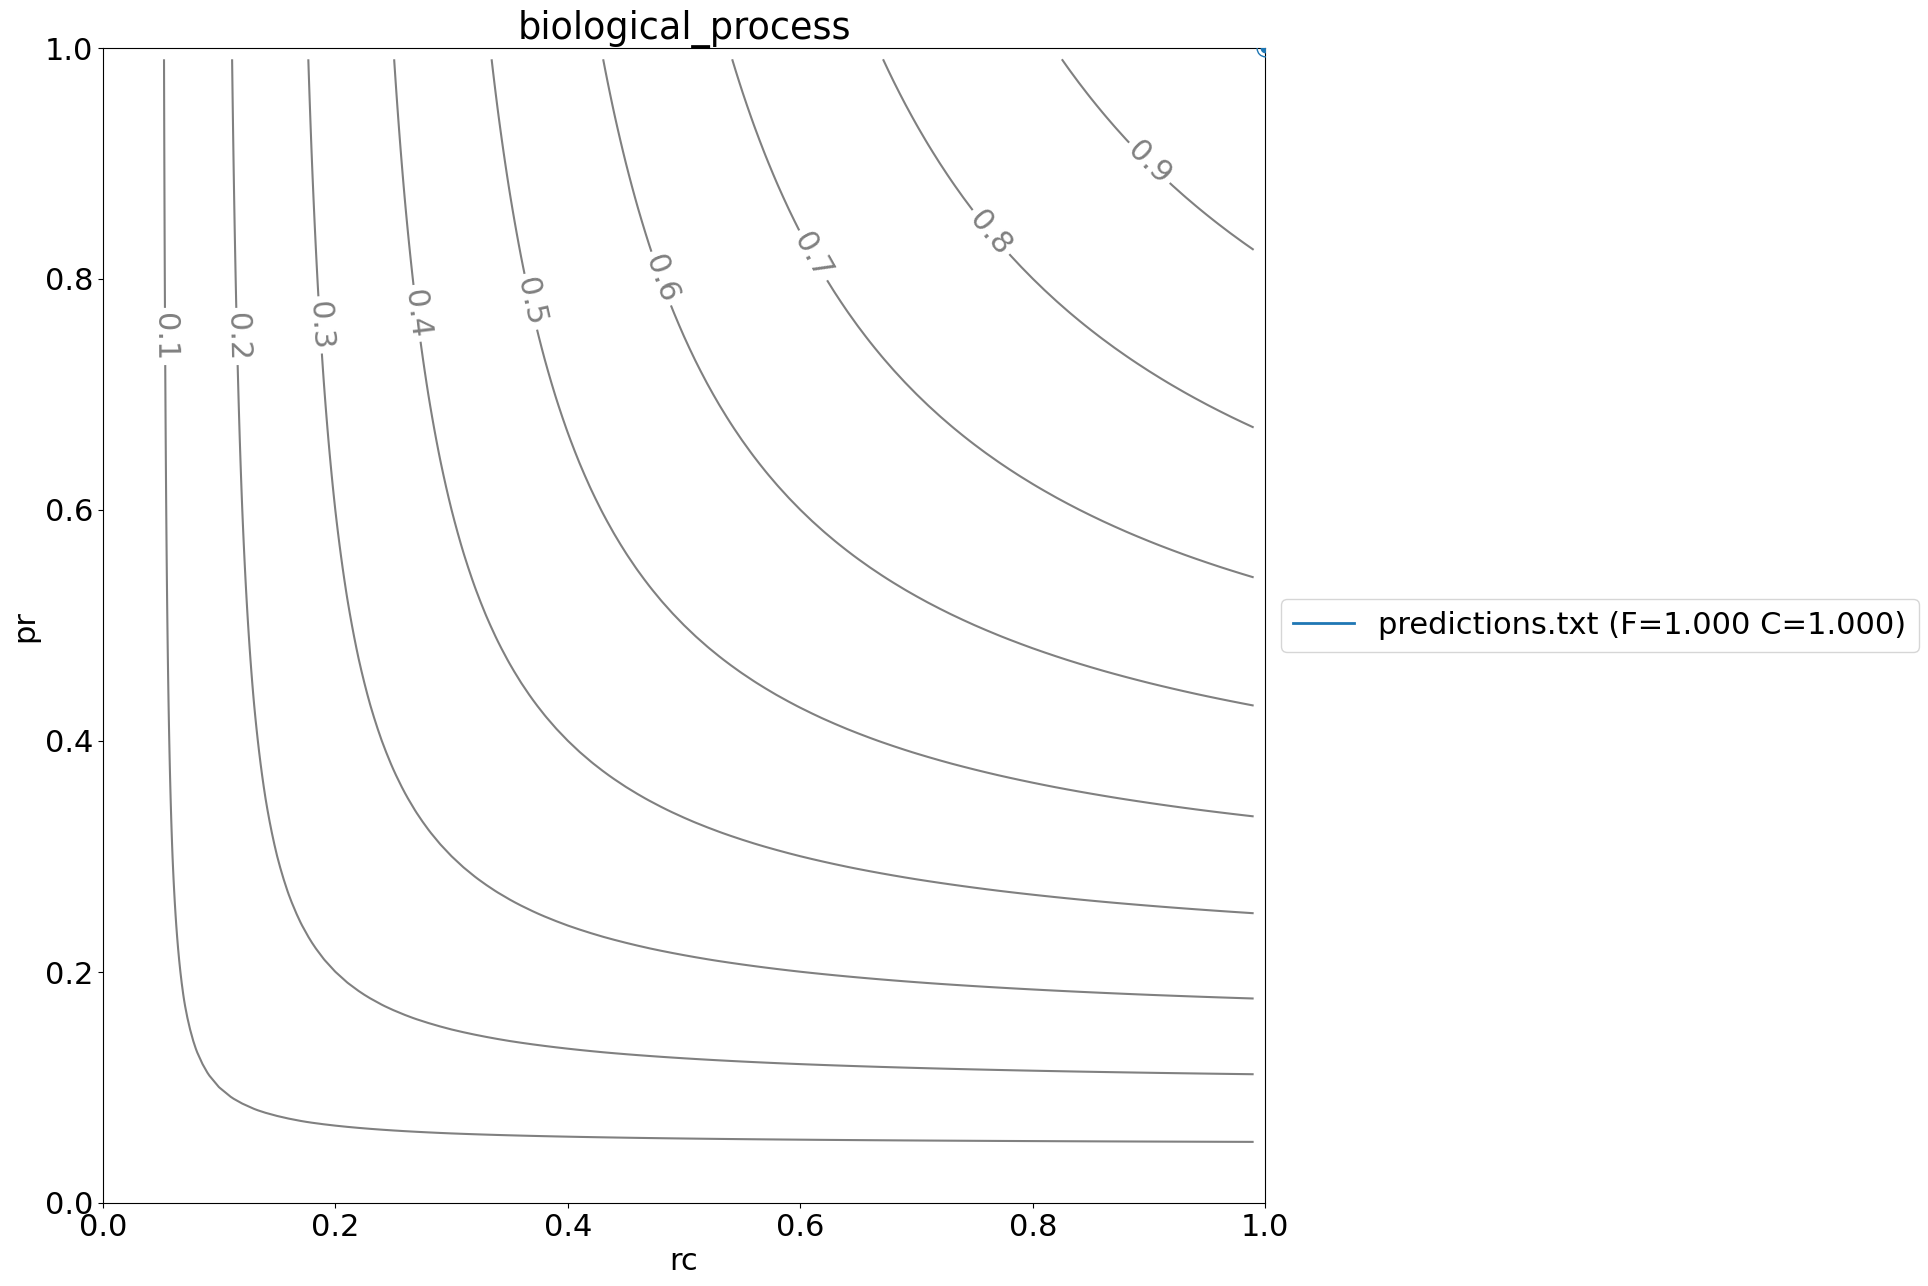

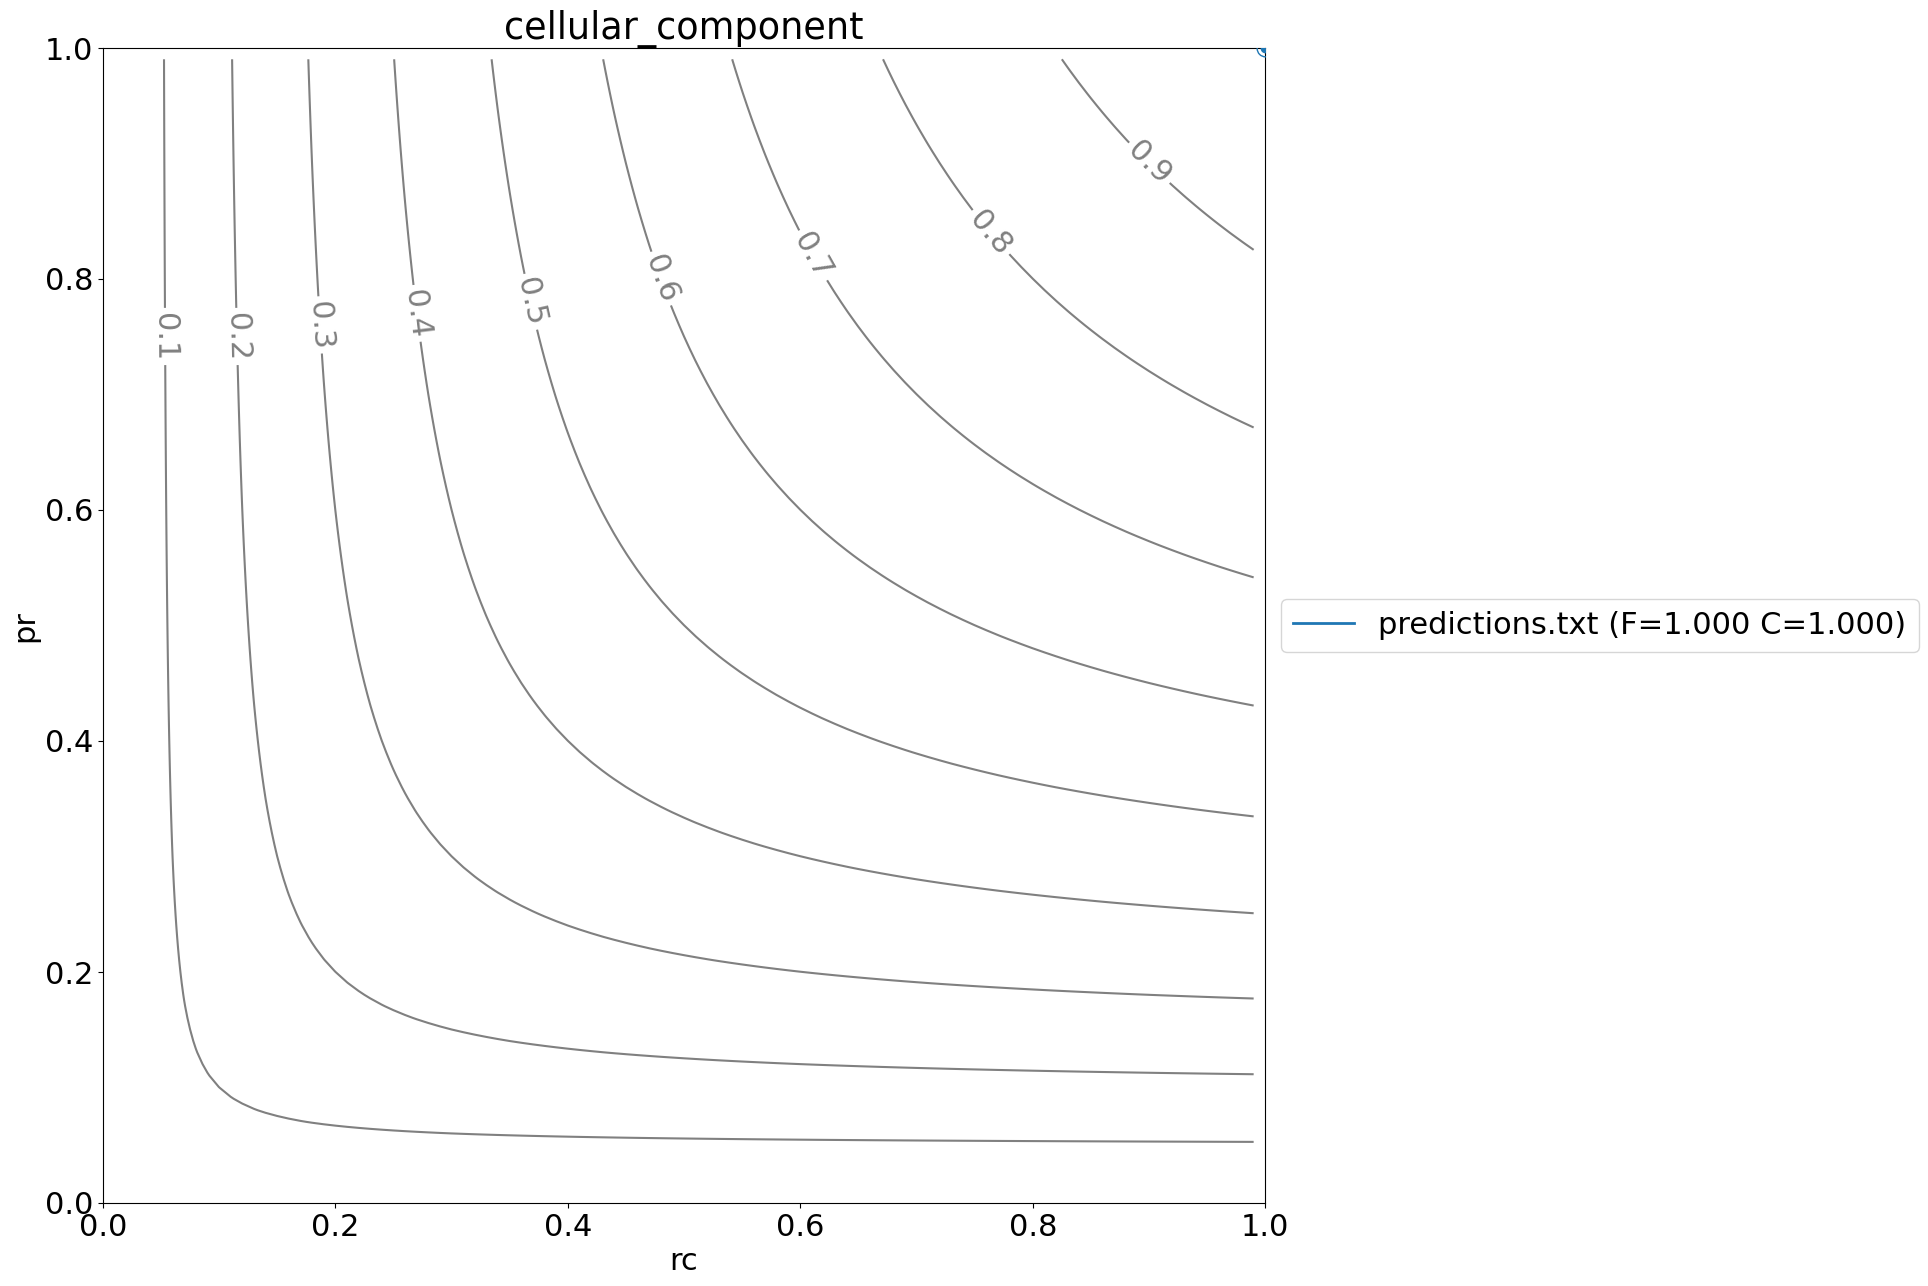

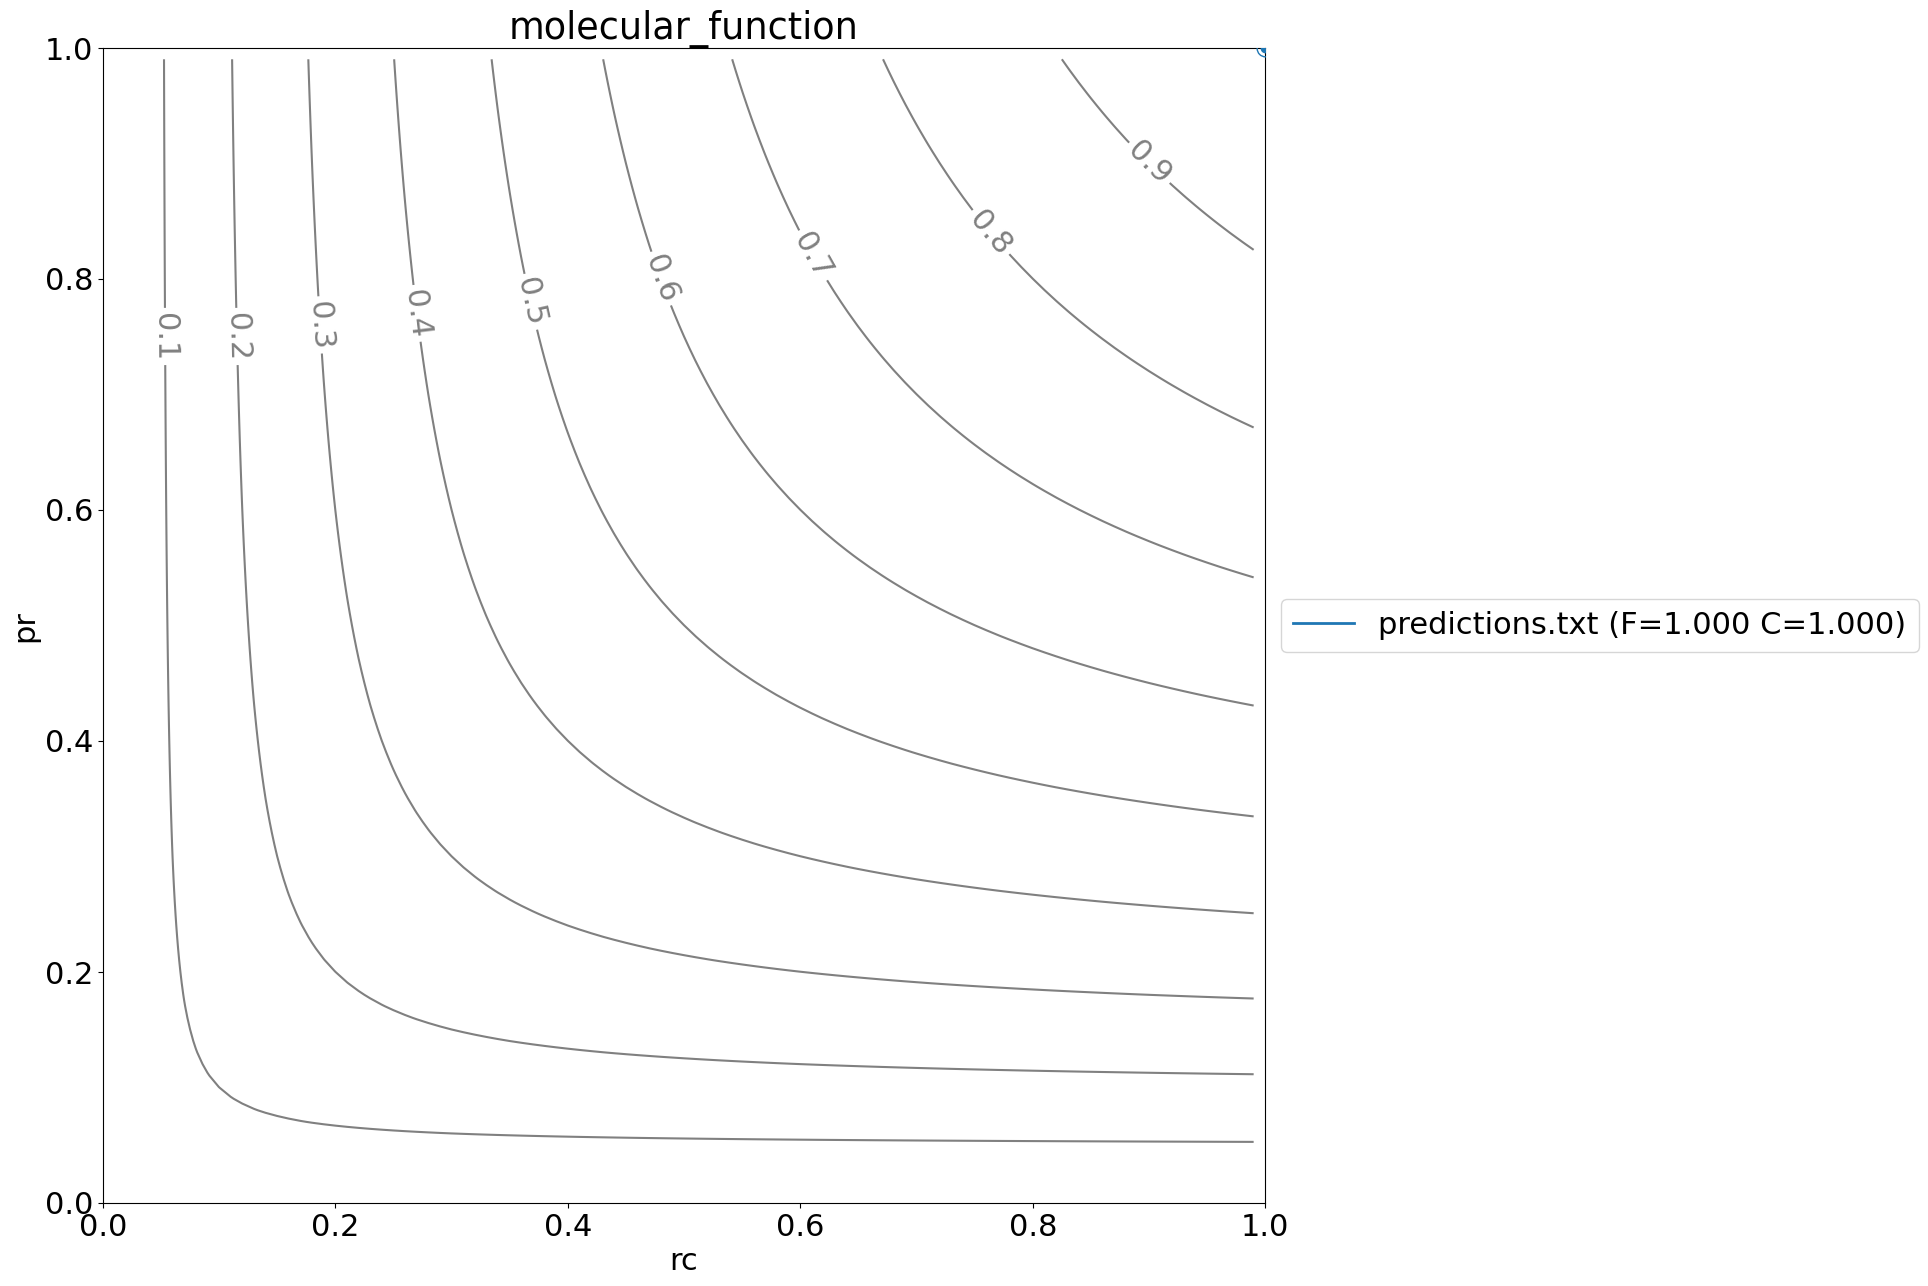

In [16]:
plt.rcParams.update({'font.size': 22})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines
    if metric in ['f', 'wf']:
        CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
        ax.clabel(CS, inline=True)#, fontsize=10)

    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric in ['f', 'wf'] else True, False]).iterrows()):
        # print(row)
        data = df_methods.loc[index[:-1]]
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    ax.set_title(ns)
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])



    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight')
    # plt.clf()